# Astroalign in Python 3 Ubuntu Linux

https://astroalign.readthedocs.io/en/latest/

In [1]:
import sys
sys.executable

'/usr/bin/python3'

In [2]:
sys.version

'3.5.2 (default, Nov 23 2017, 16:37:01) \n[GCC 5.4.0 20160609]'

In [3]:
import astroalign
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(seed=12)

In [4]:
h, w = img_shape = (200, 200)
n_stars = 10
pos_x = np.random.randint(10, w - 10, n_stars)
pos_y = np.random.randint(10, h - 10, n_stars)
fluxes = 200.0 + np.random.rand(n_stars) * 300.0

img = np.zeros(img_shape)
for x, y, f in zip(pos_x, pos_y, fluxes):
    img[x, y] = f

# Let's rotate and make the image twice as big
from scipy.ndimage import rotate, zoom
img_rotated = rotate(img, angle=30.0, reshape=False)
img_rotated = zoom(img_rotated, 1.5, order=2)

# Let's add a Gaussian PSF response with different seeing for both images
from scipy.ndimage.filters import gaussian_filter
img = gaussian_filter(img, sigma=2.0, mode='constant')
img_rotated = gaussian_filter(img_rotated, sigma=1.5, mode='constant')

# Let's add some noise to the images
noise_dc = 5.0
noise_std = np.sqrt(noise_dc)
img += np.random.normal(loc=noise_dc, scale=noise_std, size=img.shape)
img_rotated += np.random.normal(loc=noise_dc, scale=noise_std, size=img_rotated.shape)

In [5]:
img_aligned = astroalign.register(img, img_rotated)

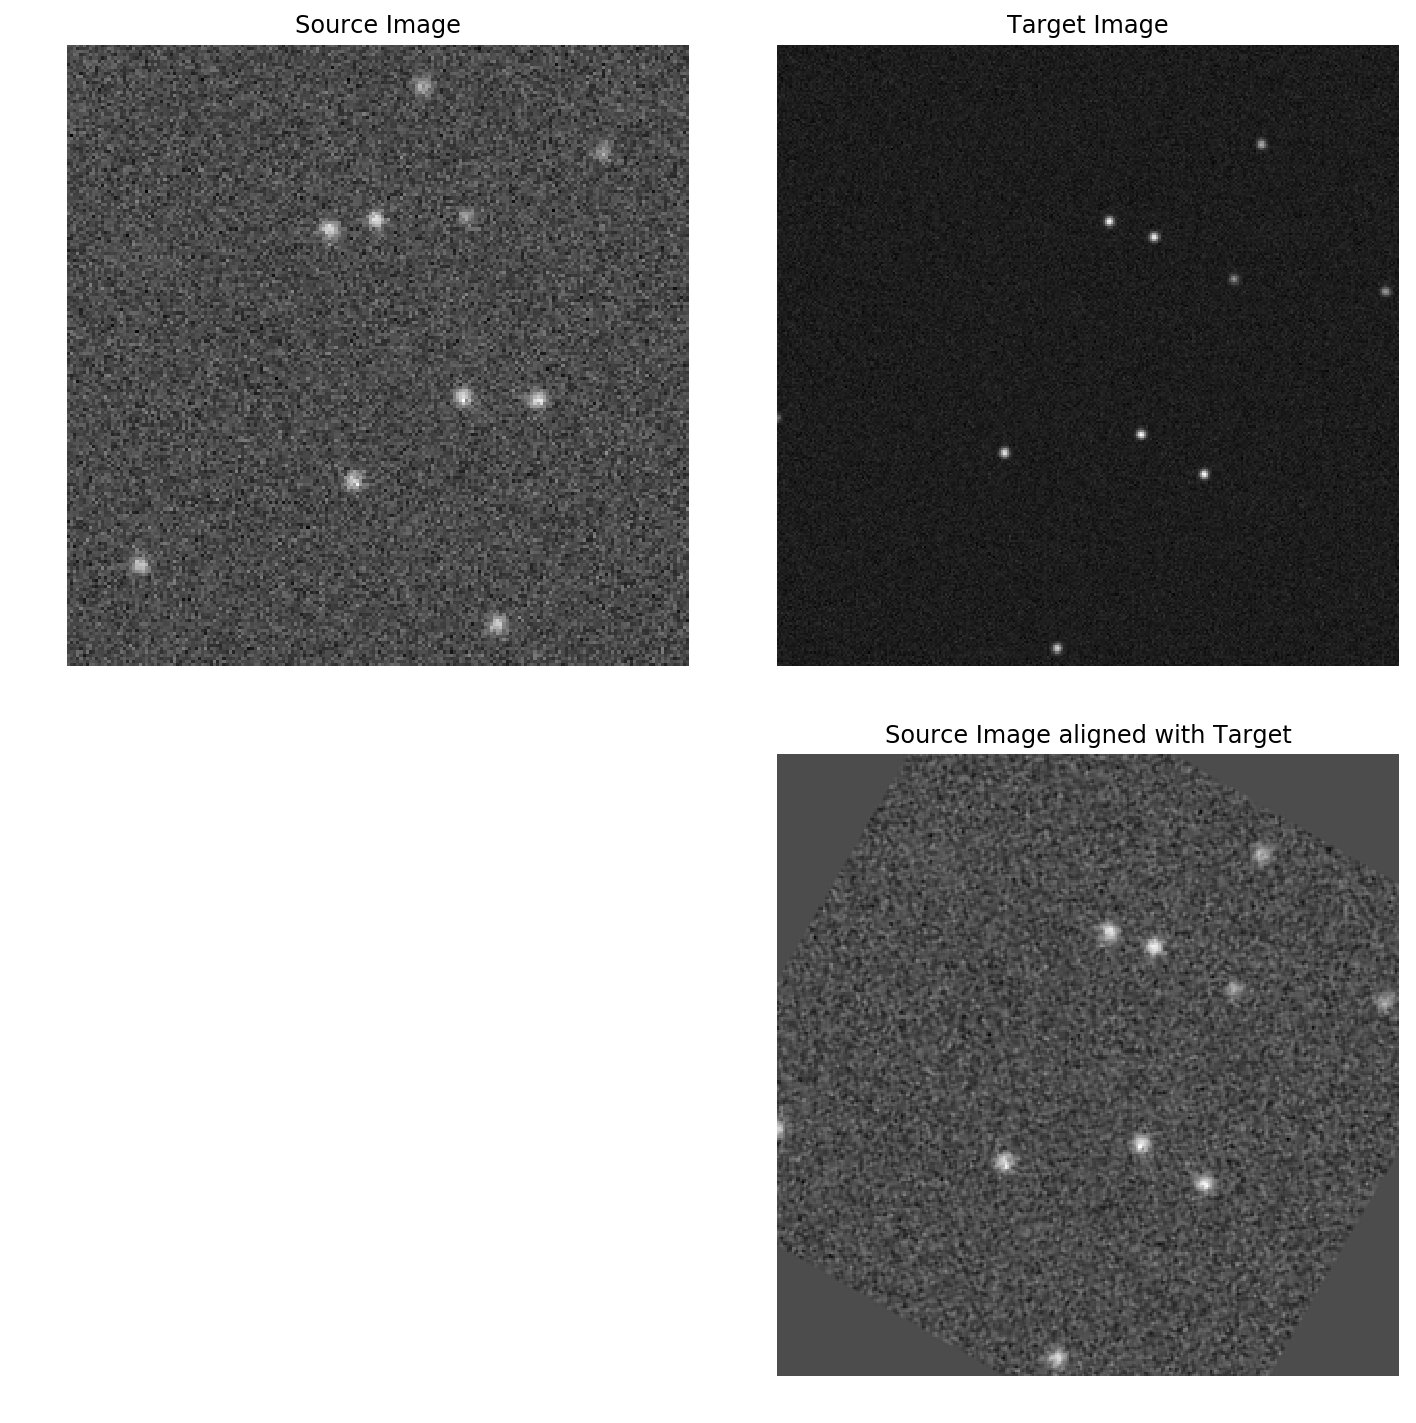

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(img, cmap='gray', interpolation='none', origin='lower')
axes[0, 0].axis('off')
axes[0, 0].set_title("Source Image")

axes[0, 1].imshow(img_rotated, cmap='gray', interpolation='none', origin='lower')
axes[0, 1].axis('off')
axes[0, 1].set_title("Target Image")

axes[1, 1].imshow(img_aligned, cmap='gray', interpolation='none', origin='lower')
axes[1, 1].axis('off')
axes[1, 1].set_title("Source Image aligned with Target")

axes[1, 0].axis('off')

plt.tight_layout()
plt.show()


In [7]:
p, (pos_img, pos_img_rot) = astroalign.find_transform(img, img_rotated)

In [8]:
print("Rotation: {:.2f} degrees".format(p.rotation * 180.0 / np.pi))
print("\nScale factor: {:.2f}".format(p.scale))
print("\nTranslation: (x, y) = ({:.2f}, {:.2f})".format(*p.translation))
print("\nTranformation matrix:\n{}".format(p.params))
print("\nPoint correspondence:")
for (x1, y1), (x2, y2) in zip(pos_img, pos_img_rot):
    print("({:.2f}, {:.2f}) in source --> ({:.2f}, {:.2f}) in target"
          .format(x1, y1, x2, y2))


Rotation: -30.01 degrees

Scale factor: 1.50

Translation: (x, y) = (-54.37, 94.87)

Tranformation matrix:
[[  1.30047133   0.75104318 -54.36997612]
 [ -0.75104318   1.30047133  94.86982081]
 [  0.           0.           1.        ]]

Point correspondence:
(127.03, 85.98) in source --> (175.13, 111.36) in target
(23.11, 31.87) in source --> (0.58, 119.04) in target
(98.84, 142.99) in source --> (181.55, 206.49) in target
(150.93, 85.02) in source --> (205.60, 91.89) in target
(137.99, 12.88) in source --> (134.61, 7.94) in target
(113.88, 185.59) in source --> (233.35, 251.22) in target
(91.86, 59.05) in source --> (109.34, 102.41) in target
(127.86, 144.12) in source --> (220.18, 185.99) in target
(83.94, 139.89) in source --> (159.76, 213.87) in target
(172.09, 164.64) in source --> (293.24, 180.29) in target


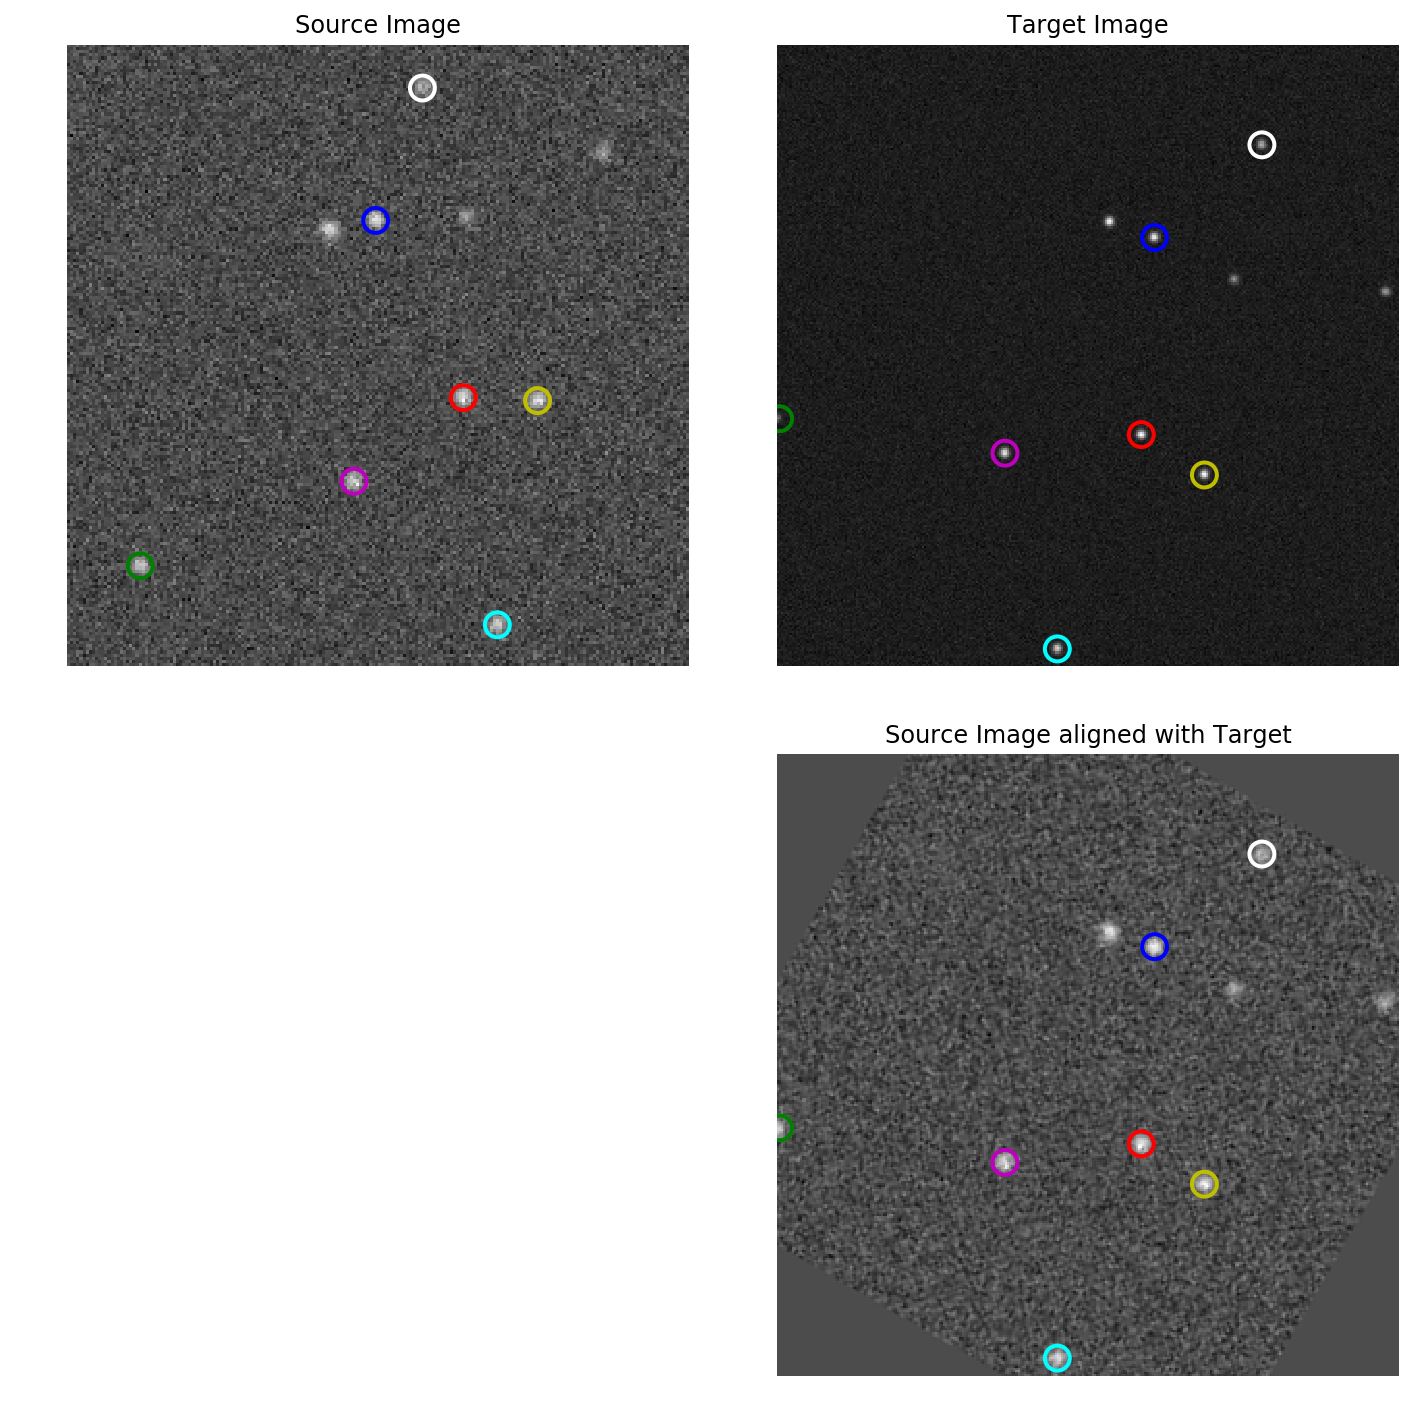

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

colors = ['r', 'g', 'b', 'y', 'cyan', 'w', 'm']

axes[0, 0].imshow(img, cmap='gray', interpolation='none', origin='lower')
axes[0, 0].axis('off')
axes[0, 0].set_title("Source Image")
for (xp, yp), c in zip(pos_img[:len(colors)], colors):
    circ = plt.Circle((xp, yp), 4, fill=False, edgecolor=c, linewidth=2)
    axes[0, 0].add_patch(circ)

axes[0, 1].imshow(img_rotated, cmap='gray', interpolation='none', origin='lower')
axes[0, 1].axis('off')
axes[0, 1].set_title("Target Image")
for (xp, yp), c in zip(pos_img_rot[:len(colors)], colors):
    circ = plt.Circle((xp, yp), 4 * p.scale, fill=False, edgecolor=c, linewidth=2)
    axes[0, 1].add_patch(circ)

axes[1, 1].imshow(img_aligned, cmap='gray', interpolation='none', origin='lower')
axes[1, 1].axis('off')
axes[1, 1].set_title("Source Image aligned with Target")
for (xp, yp), c in zip(pos_img_rot[:len(colors)], colors):
    circ = plt.Circle((xp, yp), 4 * p.scale, fill=False, edgecolor=c, linewidth=2)
    axes[1, 1].add_patch(circ)

axes[1, 0].axis('off')

plt.tight_layout()
plt.show()

In [10]:
img_aligned2 = astroalign.apply_transform(p, img, img_rotated)


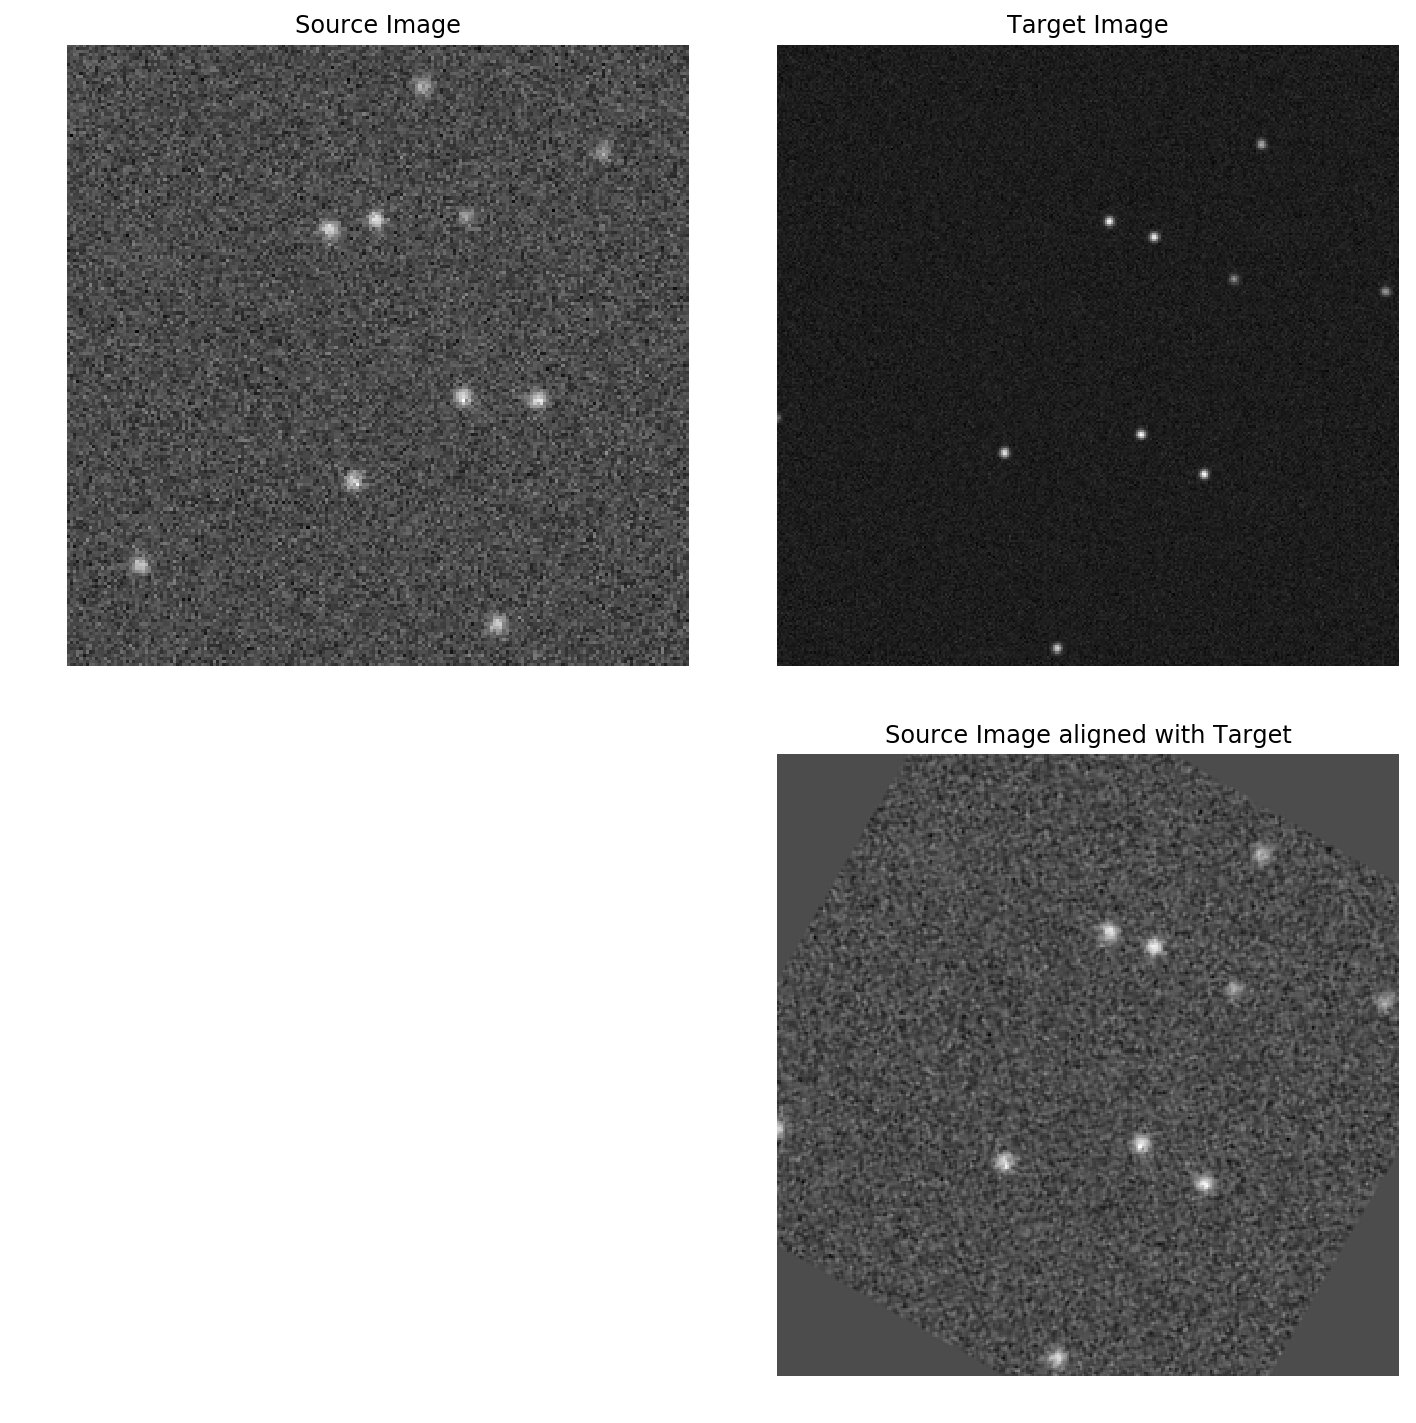

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(img, cmap='gray', interpolation='none', origin='lower')
axes[0, 0].axis('off')
axes[0, 0].set_title("Source Image")

axes[0, 1].imshow(img_rotated, cmap='gray', interpolation='none', origin='lower')
axes[0, 1].axis('off')
axes[0, 1].set_title("Target Image")

axes[1, 1].imshow(img_aligned2, cmap='gray', interpolation='none', origin='lower')
axes[1, 1].axis('off')
axes[1, 1].set_title("Source Image aligned with Target")

axes[1, 0].axis('off')

plt.tight_layout()
plt.show()
